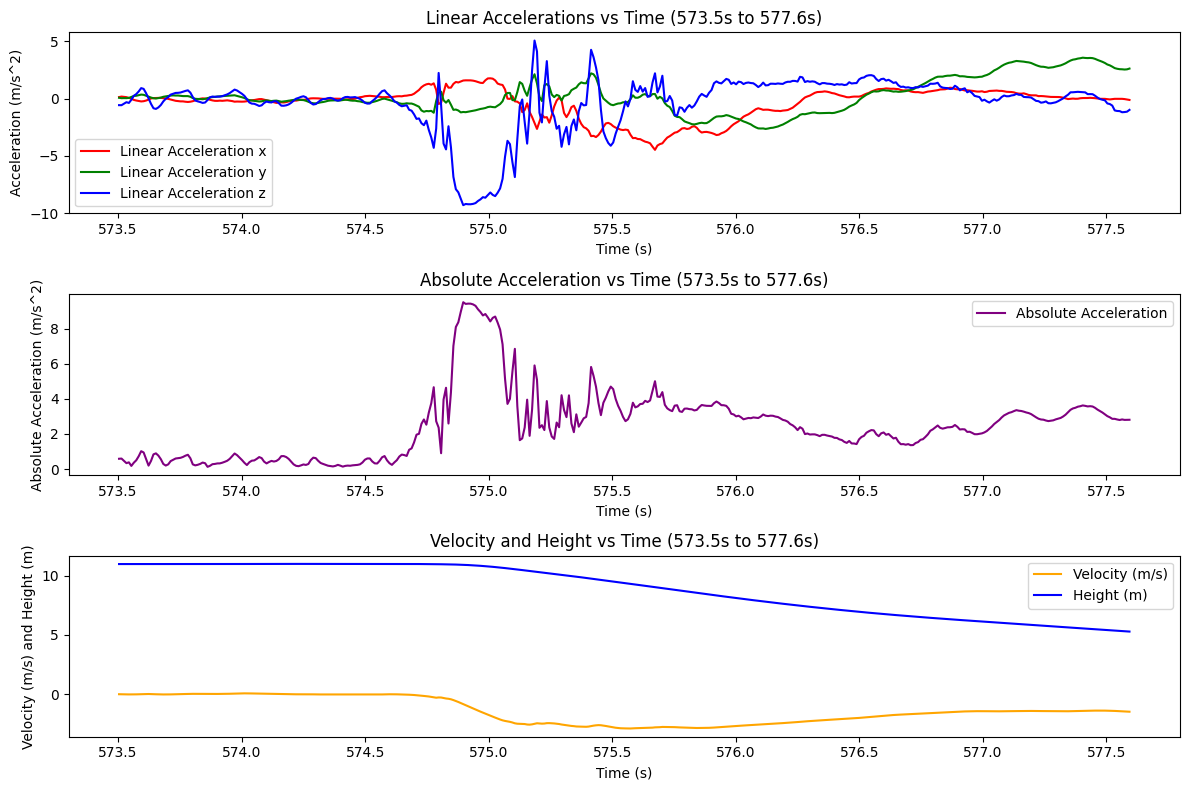

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'drop-test-data/test-jan-23-num-2-successful-deployment.csv'

# Reading the CSV file
data = pd.read_csv(file_path)

# Define the time range you want to plot (e.g., start time = 0.01s, end time = 0.05s)
t_start = 573.5
t_end = 577.6

# Filter the data based on the time range
filtered_data = data[(data['Time (s)'] >= t_start) & (data['Time (s)'] <= t_end)]

# Convert initial height from feet to meters (50 ft -> 15.24 m)
initial_height = 10.9728  # meters
initial_velocity = 0  # m/s (already assumed)

# Calculate the time differences (for integration)
time_diff = np.diff(filtered_data['Time (s)'], prepend=filtered_data['Time (s)'].iloc[0])

# Calculate the velocity by integrating the linear acceleration along the z-axis (numerical integration)
velocity_z = np.cumsum(filtered_data['Linear Acceleration z (m/s^2)'] * time_diff)

# Assuming initial velocity is 0, the integration of acceleration gives us the velocity
velocity = velocity_z  # Since we're using only z-axis acceleration

# Calculate the height by integrating the velocity (numerical integration)
# Adding initial height (50 ft -> 15.24 m) to the integrated displacement (height)
height = initial_height + np.cumsum(velocity * time_diff)

# Plotting the data
plt.figure(figsize=(12, 8))

# Plotting Linear Acceleration x, y, and z vs Time (top graph with all accelerations)
plt.subplot(3, 1, 1)  # First subplot (Top)
plt.plot(filtered_data['Time (s)'], filtered_data['Linear Acceleration x (m/s^2)'], label='Linear Acceleration x', color='r')
plt.plot(filtered_data['Time (s)'], filtered_data['Linear Acceleration y (m/s^2)'], label='Linear Acceleration y', color='g')
plt.plot(filtered_data['Time (s)'], filtered_data['Linear Acceleration z (m/s^2)'], label='Linear Acceleration z', color='b')
plt.title(f'Linear Accelerations vs Time ({t_start}s to {t_end}s)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()

# Plotting Absolute Acceleration vs Time (second graph)
plt.subplot(3, 1, 2)  # Second subplot (Middle)
plt.plot(filtered_data['Time (s)'], filtered_data['Absolute acceleration (m/s^2)'], label='Absolute Acceleration', color='purple')
plt.title(f'Absolute Acceleration vs Time ({t_start}s to {t_end}s)')
plt.xlabel('Time (s)')
plt.ylabel('Absolute Acceleration (m/s^2)')
plt.legend()

# Plotting Velocity and Height (third graph)
plt.subplot(3, 1, 3)  # Third subplot (Bottom)
plt.plot(filtered_data['Time (s)'], velocity, label='Velocity (m/s)', color='orange')
plt.plot(filtered_data['Time (s)'], height, label='Height (m)', color='blue')
plt.title(f'Velocity and Height vs Time ({t_start}s to {t_end}s)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s) and Height (m)')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()
